In [103]:
import pandas as pd

In [104]:
from matplotlib import pyplot as plt 
plt.style.use('dark_background')

In [105]:
# Read in the data into df and set the player name column as the index. 
df = pd.read_csv('data\pgadata_2010_2018.csv', index_col='Player Name')
# Set the maximum output of rows and columns 
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 20)

In [106]:
# Let's see the first 5 rows of the dataframe
df.head()

,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money
Player Name,,,,,,,,,,,,,,,,,
Henrik Stenson,60,75.19,2018,291.5,73.51,29.93,60.67,69.617,868,NaN,5.0,-0.207,1.153,0.427,0.960,-0.027,"$2,680,487"
Ryan Armour,109,73.58,2018,283.5,68.22,29.31,60.13,70.758,"1,006",1.0,3.0,-0.058,0.337,-0.012,0.213,0.194,"$2,485,203"
Chez Reavie,93,72.24,2018,286.5,68.67,29.12,62.27,70.432,"1,020",NaN,3.0,0.192,0.674,0.183,0.437,-0.137,"$2,700,018"
Ryan Moore,78,71.94,2018,289.2,68.80,29.17,64.16,70.015,795,NaN,5.0,-0.271,0.941,0.406,0.532,0.273,"$1,986,608"
Brian Stuard,103,71.44,2018,278.9,67.12,29.11,59.23,71.038,421,NaN,3.0,0.164,0.062,-0.227,0.099,0.026,"$1,089,763"


In [107]:
# Convert the NaN values in the Wins and Top 10 columns to 0's. This is critical because NaN values are ignored when 
# calculating statistics like the median and mean, which results in upper biased results as their values should've been a 0 and 
# counted.
df['Wins'].fillna(0, inplace=True)
df['Top 10'].fillna(0, inplace=True)

In [108]:
# Let's analyse the change in average driving distance over the 9 years of this dataset. First, group the dataframe by the Year
# column
year_grp = df.groupby(['Year'])
avg_distance_by_year = year_grp['Avg Distance'].mean()
avg_distance_by_year 
years = list(range(2010, 2019))

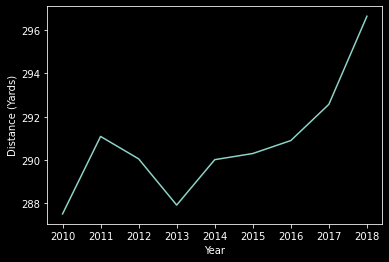

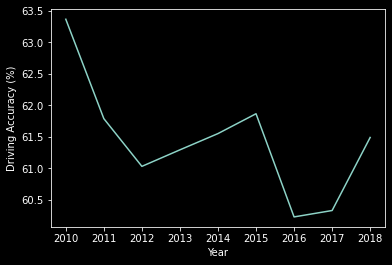

In [109]:
# Let's plot this data
plt.plot(years, avg_distance_by_year)
plt.xlabel("Year")
plt.ylabel("Distance (Yards)")
plt.show()
# Let's now see how driving accuracy has evolved over the same time period.
fairway_accuracy_per_year = year_grp['Fairway Percentage'].mean()
plt.plot(years, fairway_accuracy_per_year)
plt.xlabel("Year")
plt.ylabel("Driving Accuracy (%)")
plt.show()

In [110]:
# Lets now analyse what seperates players' seasons with different amount of wins to identify the most important attributes. 
# The clearest relationship between the average statisitcs of players with different amounts of wins should identify this.
win_grp = df.groupby(['Wins'])

In [111]:
averages_by_wins = win_grp.mean()
averages_by_wins

,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG
Wins,,,,,,,,,,,,,,
0.0,77.837276,61.516251,2013.967742,290.107670,65.558953,29.197699,57.975082,71.027651,1.938351,0.006571,0.045204,0.001912,0.027513,0.009214
1.0,83.571429,61.200252,2014.184874,293.318067,65.870084,29.031933,58.466849,70.541815,3.861345,0.088517,0.513908,0.171332,0.202210,0.053261
2.0,80.000000,61.462258,2013.483871,296.551613,67.314194,28.889032,60.243226,69.841000,5.612903,0.259548,1.205710,0.390581,0.399258,0.156161
3.0,80.636364,57.418182,2016.000000,307.090909,68.994545,28.650909,61.325455,69.292091,7.818182,0.310727,1.803000,0.636727,0.665727,0.194545
4.0,88.500000,58.500000,2016.000000,300.550000,67.600000,28.055000,62.785000,69.148500,11.500000,0.451500,1.939000,0.473000,0.678000,0.380000
5.0,61.000000,62.500000,2013.000000,293.200000,67.590000,28.850000,60.000000,68.944000,7.000000,0.426000,2.064000,-0.142000,1.533000,0.247000


Text(0, 0.5, 'Average (mean) SG Approach')

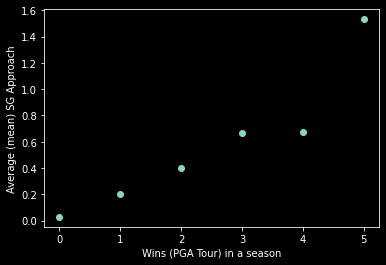

In [112]:
sg_approach_avg_per_wins = averages_by_wins['SG:APR']
wins = [x for x in range(6)]
plt.scatter(wins, sg_approach_avg_per_wins)
plt.xlabel('Wins (PGA Tour) in a season')
plt.ylabel('Average (mean) SG Approach')
# Below we see a clear positive relationship between the average SG Approach and wins per season. 

In [113]:
averages_by_wins

,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG
Wins,,,,,,,,,,,,,,
0.0,77.837276,61.516251,2013.967742,290.107670,65.558953,29.197699,57.975082,71.027651,1.938351,0.006571,0.045204,0.001912,0.027513,0.009214
1.0,83.571429,61.200252,2014.184874,293.318067,65.870084,29.031933,58.466849,70.541815,3.861345,0.088517,0.513908,0.171332,0.202210,0.053261
2.0,80.000000,61.462258,2013.483871,296.551613,67.314194,28.889032,60.243226,69.841000,5.612903,0.259548,1.205710,0.390581,0.399258,0.156161
3.0,80.636364,57.418182,2016.000000,307.090909,68.994545,28.650909,61.325455,69.292091,7.818182,0.310727,1.803000,0.636727,0.665727,0.194545
4.0,88.500000,58.500000,2016.000000,300.550000,67.600000,28.055000,62.785000,69.148500,11.500000,0.451500,1.939000,0.473000,0.678000,0.380000
5.0,61.000000,62.500000,2013.000000,293.200000,67.590000,28.850000,60.000000,68.944000,7.000000,0.426000,2.064000,-0.142000,1.533000,0.247000


In [114]:
# Now let's take a look at some of the best performing seasons in the data. Our criteria for this is at least 3 wins and 
# at least an average SG total of 1.8 (per round)
filter = ((df['Wins'] >= 3) & (df['Average SG Total']) >= 1.8)

In [115]:
df.loc[filter]

,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money
Player Name,,,,,,,,,,,,,,,,,


In [118]:
# Output the 10 best seasons in terms of Average Strokes Gained per round
df['Average SG Total'].nlargest(10)

Player Name
Rory McIlroy      2.406
Dustin Johnson    2.372
Tiger Woods       2.310
Luke Donald       2.278
Rory McIlroy      2.266
Henrik Stenson    2.210
Steve Stricker    2.193
Jordan Spieth     2.154
Jason Day         2.118
Jason Day         2.106
Name: Average SG Total, dtype: float64